In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
data_describe = pd.read_csv("data/feature_descriptions.csv")
real_data = pd.read_csv("data/real_data.csv")
syn_data = pd.read_csv("data/synthetic_data.csv")

In [3]:
encode_dist_real = {}
encode_dist_syn = {}
for i in real_data.columns:
    encode_dist_real[i] = set(real_data.loc[:, i].values)
    encode_dist_syn[i] = set(syn_data.loc[:, i].values)
    if len(encode_dist_real[i]) < len(encode_dist_syn[i]):
        print(i)


tolazamide
glimepiride-pioglitazone


In [4]:
real_data.columns


Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       '_diag_1', '_diag_2', '_diag_3'],
      dtype='object')

In [5]:
encoders = {} # a dict storing all encoder of each column
for i in real_data.columns:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(np.hstack((real_data.loc[:, i], syn_data.loc[:, i])))
    encoders[i] = encoder

In [6]:
discrete_props = ['race', 'gender', 'age',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       '_diag_1', '_diag_2', '_diag_3']

In [7]:
not_in_pc = ["chlorpropamide", "acetohexamide", "tolbutamide", "miglitol", "tolazamide", "glyburide-metformin", "glipizide-metformin"]

In [8]:
def encode(dataframe):
    """encode the input dataframe"""
    data_num = dataframe.shape[0]   
    discre = np.zeros(data_num).reshape(-1, 1)
    contin = np.zeros(data_num).reshape(-1, 1)
    for i in dataframe.columns:
        if i == "readmitted": continue
        if i in not_in_pc: continue
        if i in discrete_props:
            codes = encoders[i].transform(dataframe.loc[:, i])
            discre = np.hstack((discre, codes.reshape(-1, 1)))
        else:
            codes = np.array(dataframe.loc[:, i])  
            contin = np.hstack((contin, codes.reshape(-1, 1)))
        
    return discre[:, 1:], contin[:, 1:]

In [9]:
real_data_discre, real_data_contin = encode(real_data)
syn_data_discre, syn_data_contin = encode(syn_data)

In [10]:
real_pca = KernelPCA(9, kernel = "poly")
real_pca.fit(real_data_contin[:5000])

syn_pca = KernelPCA(9, kernel = "poly")
syn_pca.fit(syn_data_contin[:5000])

KernelPCA(kernel='poly', n_components=9)

In [ ]:
real_data_contin_pca = real_pca.transform(real_data_contin)
syn_data_contin_pca = syn_pca.transform(syn_data_contin)

In [ ]:
#pca.explained_variance_ratio_
#pca.components_

In [10]:
real_labels = encoders["readmitted"].transform(real_data.loc[:, "readmitted"])
pd.DataFrame(real_labels).value_counts()


syn_labels = encoders["readmitted"].transform(syn_data.loc[:, "readmitted"])
pd.DataFrame(syn_labels).value_counts()

2    41679
1    27895
0     8867
dtype: int64

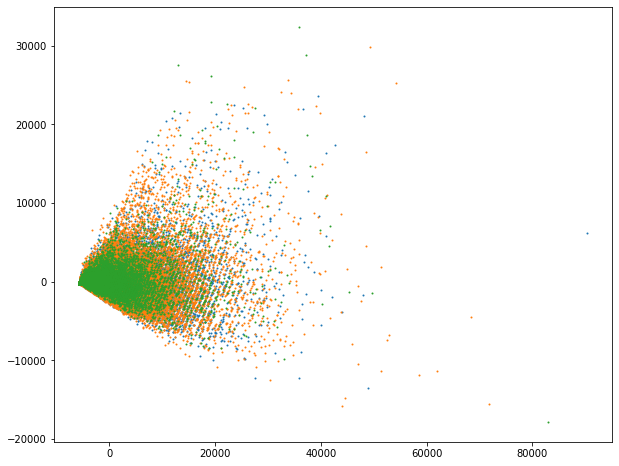

In [150]:
#%matplotlib notebook
%matplotlib inline
#%matplotlib auto

#fig = plt.figure()
ax = plt
ax.rcParams['figure.figsize'] = (10.0, 8.0)
ax.scatter(real_data_contin_pca[real_labels == 1, 0], real_data_contin_pca[real_labels == 1, 1], s = 1)#, real_data_contin_pca[real_labels == 1, 2], s = 5)
ax.scatter(real_data_contin_pca[real_labels == 2, 0], real_data_contin_pca[real_labels == 2, 1], s = 1)#, real_data_contin_pca[real_labels == 2, 2], s = 5)
ax.scatter(real_data_contin_pca[real_labels == 0, 0], real_data_contin_pca[real_labels == 0, 1], s = 1)#, real_data_contin_pca[real_labels == 0, 2], s = 5)
ax.show()

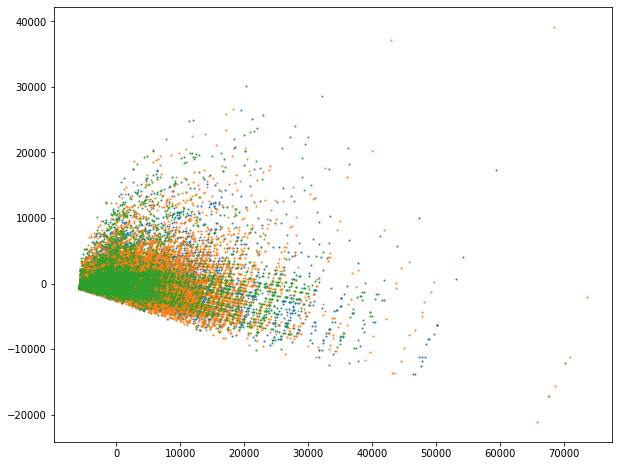

In [151]:
ax = plt
ax.rcParams['figure.figsize'] = (10.0, 8.0)
ax.scatter(syn_data_contin_pca[syn_labels == 1, 0], syn_data_contin_pca[syn_labels == 1, 1], s = 1)#, real_data_contin_pca[real_labels == 1, 2], s = 5)
ax.scatter(syn_data_contin_pca[syn_labels == 2, 0], syn_data_contin_pca[syn_labels == 2, 1], s = 1)#, real_data_contin_pca[real_labels == 2, 2], s = 5)
ax.scatter(syn_data_contin_pca[syn_labels == 0, 0], syn_data_contin_pca[syn_labels == 0, 1], s = 1)#, real_data_contin_pca[real_labels == 0, 2], s = 5)
ax.show()

In [11]:
# here in order to check which model is better, we make the distribution of 3 labels even. 
# when comparing the performance on real data and syn data, we do not use the sampled data generated here.

np.random.seed(1)
mask2 = np.random.choice(np.where(real_labels == 2)[0], 8830, replace = False)
np.random.seed(2)
mask1 = np.random.choice(np.where(real_labels == 1)[0], 8830, replace = False)


real_data_discre_sample = np.vstack((real_data_discre[mask2], real_data_discre[mask1], real_data_discre[real_labels == 0]))
real_data_contin_sample = np.vstack((real_data_contin[mask2], real_data_contin[mask1], real_data_contin[real_labels == 0]))
real_labels_sample = np.array([2] * 8830 + [1] * 8830 + [0] * 8830) 

In [12]:
np.random.seed(1)
mask2 = np.random.choice(np.where(syn_labels == 2)[0], 8867, replace = False)
np.random.seed(2)
mask1 = np.random.choice(np.where(syn_labels == 1)[0], 8867, replace = False)


syn_data_discre_sample = np.vstack((syn_data_discre[mask2], syn_data_discre[mask1], syn_data_discre[syn_labels == 0]))
syn_data_contin_sample = np.vstack((syn_data_contin[mask2], syn_data_contin[mask1], syn_data_contin[syn_labels == 0]))
syn_labels_sample = np.array([2] * 8867 + [1] * 8867 + [0] * 8867) 

In [95]:
# Here we use cross-valid to check which model is better, to find that a combination of NN and RF works best.


mlp = MLPClassifier([20, 50, 20, 5], activation="relu", max_iter=500)#, verbose=True)
rf = RandomForestClassifier(max_depth=12)
svc = SVC(kernel = "rbf")

# data and model
model1 = mlp
model2 = rf
model3 = svc

data_discre_sample = syn_data_discre_sample
data_contin_sample = syn_data_contin_sample
labels_sample = syn_labels_sample



kf = KFold(3, shuffle = True)
acc_test = []
acc_train = []
res = np.zeros(1)
for train, test in kf.split(data_discre_sample):
    
    model1.fit(data_contin_sample[train], labels_sample[train])
    model1_out = model1.predict(data_contin_sample[train])
    
    print(np.sum(model1_out == labels_sample[train]) / labels_sample[train].shape[0])
    
    labels_4_in_all = labels_sample[train].copy()
    labels_4_in_all[model1_out != labels_sample[train]] = 3 # not clear points

    model1.fit(data_contin_sample[train], labels_4_in_all)
    model1_out = model1.predict(data_contin_sample[train])
    
    print(np.sum(model1_out == labels_4_in_all) / labels_4_in_all.shape[0])
    
    model2.fit(data_discre_sample[train][model1_out == 3], labels_sample[train][model1_out == 3])
    model2_out = model2.predict(data_discre_sample[train][model1_out == 3])
    
    print(np.sum(model2_out == labels_sample[train][model1_out == 3]) / labels_sample[train][model1_out == 3].shape[0])
    
    train_out = model1_out.copy()
    train_out[model1_out == 3] = model2_out

    test_out_1 = model1.predict(data_contin_sample[test])
    test_out_2 = model2.predict(data_discre_sample[test][test_out_1 == 3])

    test_out = test_out_1.copy()
    test_out[test_out_1 == 3] = test_out_2
    
                              
    ac = np.sum(test_out == labels_sample[test]) / labels_sample[test].shape[0]
    ac_t = np.sum(train_out == labels_sample[train]) / labels_sample[train].shape[0]
    
    res = np.hstack((res, test_out))
    acc_test.append(ac)
    acc_train.append(ac_t)


0.6202774331792038
0.6265929852261193
0.8214426487977927
0.6012179993233338
0.6366865907296718
0.8264758497316637
0.6109732716815157
0.6316679824066764
0.8104823395366502


In [15]:
# Use part of synthetic data to train model on, and test on another part of synthetic data and on real data, check the difference of accurcy.
# Find that the accuracy is significant low on real data, which indicates a different between real and syn data.


mlp = MLPClassifier([20, 50, 20, 5], activation="relu", max_iter=500)#, verbose=True)
rf = RandomForestClassifier(max_depth=12)
svc = SVC(kernel = "rbf")

# data and model
model1 = mlp
model2 = rf
model3 = svc

#data_discre_sample = syn_data_discre
#data_contin_sample = syn_data_contin
#labels_sample = syn_labels



np.random.seed(1)
mask2 = np.random.choice(np.where(syn_labels == 2)[0], 6000, replace = False)
np.random.seed(2)
mask1 = np.random.choice(np.where(syn_labels == 1)[0], 4000, replace = False)
np.random.seed(3)
mask0 = np.random.choice(np.where(syn_labels == 0)[0], 2000, replace = False)


syn_data_discre_train = np.vstack((syn_data_discre[mask2], syn_data_discre[mask1], syn_data_discre[mask0]))
syn_data_contin_train = np.vstack((syn_data_contin[mask2], syn_data_contin[mask1], syn_data_contin[mask0]))
syn_labels_train = np.array([2] * 6000 + [1] * 4000 + [0] * 2000) 

not_mask2 = []
for i in np.where(syn_labels == 2)[0]:
    if i not in mask2:
        not_mask2.append(i)
not_mask1 = []
for i in np.where(syn_labels == 1)[0]:
    if i not in mask1:
        not_mask1.append(i)
not_mask0 = []
for i in np.where(syn_labels == 0)[0]:
    if i not in mask0:
        not_mask0.append(i)
        

syn_data_discre_test = np.vstack((syn_data_discre[not_mask2], syn_data_discre[not_mask1], syn_data_discre[not_mask0]))
syn_data_contin_test = np.vstack((syn_data_contin[not_mask2], syn_data_contin[not_mask1], syn_data_contin[not_mask0]))
syn_labels_test = np.array([2] * len(not_mask2) + [1] * len(not_mask1) + [0] * len(not_mask0)) 




    
model1.fit(syn_data_contin_train , syn_labels_train)
model1_out = model1.predict(syn_data_contin_train)
    
    
labels_4_in_all = syn_labels_train.copy()
labels_4_in_all[model1_out != syn_labels_train] = 3 # not clear points

model1.fit(syn_data_contin_train, labels_4_in_all)
model1_out = model1.predict(syn_data_contin_train)

    
model2.fit(syn_data_discre_train[model1_out == 3], syn_labels_train[model1_out == 3])
model2_out = model2.predict(syn_data_discre_train[model1_out == 3])
    
train_out = model1_out.copy()
train_out[model1_out == 3] = model2_out



syn_test_out_1 = model1.predict(syn_data_contin_test)
syn_test_out_2 = model2.predict(syn_data_discre_test[syn_test_out_1 == 3])
syn_test_out = syn_test_out_1.copy()
syn_test_out[syn_test_out_1 == 3] = syn_test_out_2


real_test_out_1 = model1.predict(real_data_contin)
real_test_out_2 = model2.predict(real_data_discre[real_test_out_1 == 3])
real_test_out = real_test_out_1.copy()
real_test_out[real_test_out_1 == 3] = real_test_out_2

In [16]:
acc_syn_test = np.sum(syn_test_out == syn_labels_test) / syn_labels_test.shape[0]
acc_real_test = np.sum(real_test_out == real_labels) / real_labels.shape[0]

In [24]:
acc_syn_test

0.6825153143390377

In [22]:
acc_real_test

0.5281294221134356